In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from scipy.optimize import curve_fit as cf

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
from scipy.signal import find_peaks as fp
from scipy.signal import savgol_filter as savgol

[1567]
[1567]
[1567]
[1583]
[1567]
[1553]
[1581]
[1568]
[1566]
[1569]
[1568]


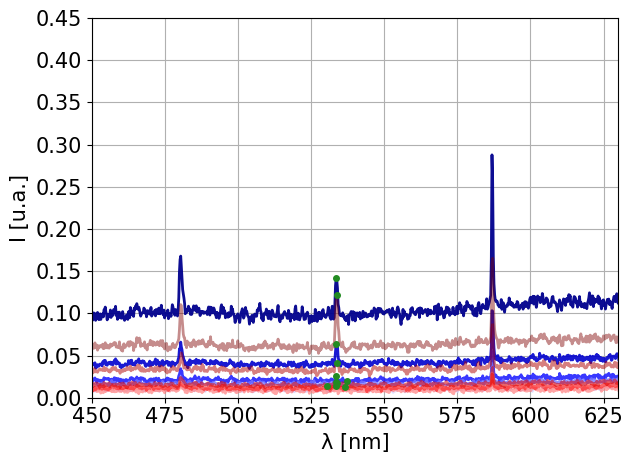

In [99]:
cmap = mpl.colormaps['seismic']
colors = cmap(np.linspace(0,1,12))

pks_centrales = []
for i in range(1,12):
    df = pd.read_csv(f'verde/{i*30}.csv',header=None,names=['long','I'])
    plt.plot(df.long,df.I,c=colors[i],alpha=1-i*0.05,zorder=1)
    plt.xlim(450,630)
    plt.ylim(0,0.45)
    pks = fp(df.I[1530:1600],distance=60)[0] + 1530
    print(pks)
    plt.scatter(df.long[pks],df.I[pks],c='forestgreen',zorder=3)
    
plt.grid()
plt.xlabel('\u03BB [nm]')
plt.ylabel('I [u.a.]')
plt.tight_layout()

In [7]:
print(df.long[1530],df.long[1600])

525.3126221 540.958313


In [48]:
picos_verde = pd.DataFrame(np.zeros((12,3)),columns=['a','b','c'])
# la columna a es el primer pico, b el segundo y c el último

In [92]:
picos_verde.iloc[n,:] = [1328,1568,1805]
picos_verde

,a,b,c
0,1328.0,1567.0,1804.0
1,1328.0,1567.0,1804.0
2,1328.0,1567.0,1804.0
3,1328.0,1567.0,1804.0
4,1328.0,NaN,1804.0
5,1328.0,NaN,1804.0
6,1326.0,NaN,1804.0
7,1328.0,NaN,1805.0
8,1328.0,1568.0,1804.0
9,1328.0,NaN,1805.0


[1328 1567 1804]


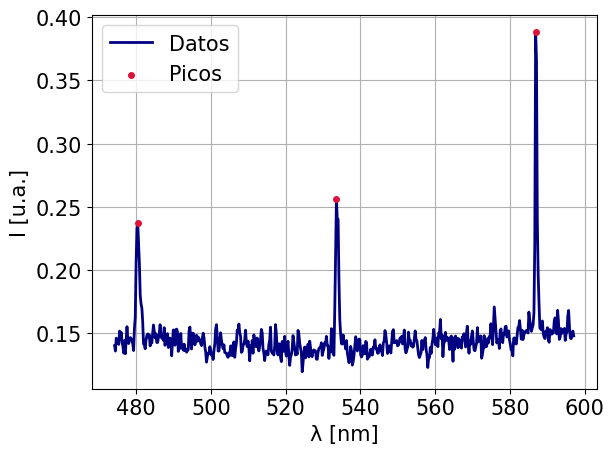

In [137]:
n = 0
df = pd.read_csv(f'verde/{n*30}.csv',header=None,names=['long','I'])
df_picos = df[1300:1850]

pks = fp(df_picos.I,distance=10,prominence=0.1)[0] + 1300
lambdas = np.array(df.long[pks])
print(pks)

plt.plot(df_picos.long,df_picos.I,c='navy',zorder=1,label='Datos')
plt.scatter(df.long[pks],df.I[pks],c='crimson',zorder=2,label='Picos')
plt.grid()
plt.xlabel('\u03BB [nm]')
plt.ylabel('I [u.a.]')
plt.legend()
plt.tight_layout()
plt.savefig('plots/espectro.png')

In [100]:
a_verde = df.long[picos_verde.a[picos_verde.a.notna()]]
b_verde = df.long[picos_verde.b[picos_verde.b.notna()]]
c_verde = df.long[picos_verde.c[picos_verde.c.notna()]]

In [129]:
long_a = np.mean(a_verde)
err_a = np.sqrt(np.var(a_verde)+np.mean(np.diff(df.long))**2)
long_b = np.mean(b_verde)
err_b = np.sqrt(np.var(b_verde)+np.mean(np.diff(df.long))**2)
long_c = np.mean(c_verde)
err_c = np.sqrt(np.var(c_verde)+np.mean(np.diff(df.long))**2)

print(f'\u03BB_a = ({np.round(long_a,1)} \u00b1 {np.round(err_a,1)}) nm')
print(f'\u03BB_b = ({np.round(long_b,1)} \u00b1 {np.round(err_b,1)}) nm')
print(f'\u03BB_c = ({np.round(long_c,1)} \u00b1 {np.round(err_c,1)}) nm')

laserb = 2*long_b
err_laserb = 2*err_b
laserac = long_a + long_c
err_laserac = np.sqrt(err_a**2+err_c**2)

print(f'Dos fotones del pico central suman ({np.round(laserb,1)} \u00b1 {np.round(err_laserb,1)}) nm')
print(f'Un fotón del primer pico y uno del tercer pico suman ({np.round(laserac,1)} \u00b1 {np.round(err_laserac,1)}) nm')

#np.mean(a_verde) + np.mean(c_verde)
#np.mean(b_verde)*2

λ_a = (480.4 ± 0.3) nm
λ_b = (533.7 ± 0.3) nm
λ_c = (586.9 ± 0.2) nm
Dos fotones del pico central suman (1067.4 ± 0.6) nm
Un fotón del primer pico y uno del tercer pico suman (1067.3 ± 0.4) nm


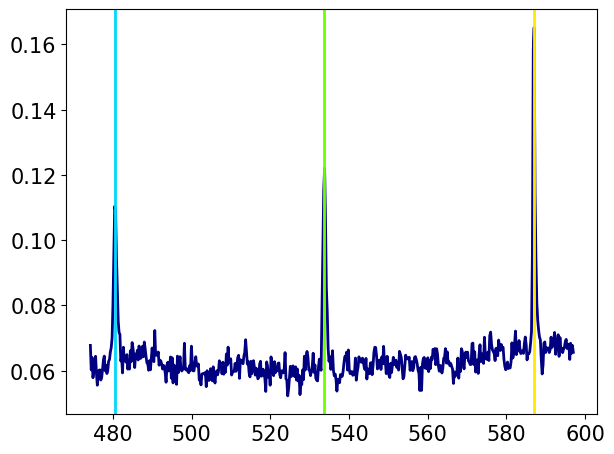

In [115]:
plt.plot(df_picos.long,df_picos.I,c='navy',zorder=1)
plt.axvline(long_a,c=wavelength_to_rgb(long_a))
plt.axvline(long_b,c=wavelength_to_rgb(long_b))
plt.axvline(long_c,c=wavelength_to_rgb(long_c))

In [113]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B)

In [90]:
angulos = np.arange(0,360,30)
long_verde = []
int_verde = []
for i in range(12):
    pico = picos_verde[i]
    df = pd.read_csv(f'verde/{angulos[i]}.csv',header=None,names=['long','I'])
    long_verde.append(df.long[pico])
    int_verde.append(df.I[pico])
long_verde = np.array(long_verde)
int_verde = np.array(int_verde)
#angulos = np.radians(angulos)

In [98]:
print(np.mean(long_verde),np.sqrt(np.std(long_verde)**2+np.mean(np.diff(df.long))**2))

533.5017293333334 0.4026050498657382


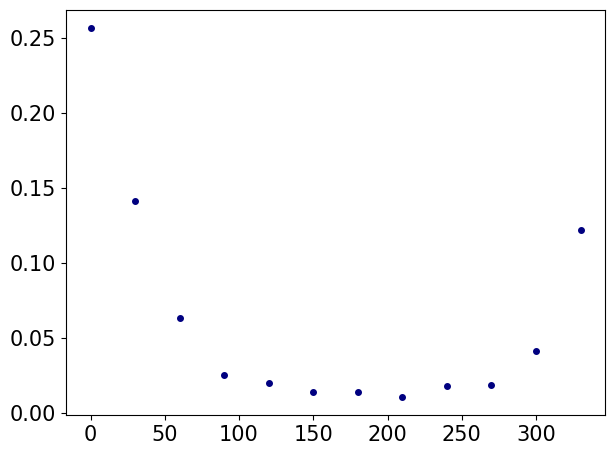

In [91]:
plt.scatter(angulos,int_verde,c='navy')
A = (max(int_verde)-min(int_verde))/2
B = (max(int_verde)+min(int_verde))/2
#plt.plot(angulos,A*np.cos(angulos)+B,c='crimson')